In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
tree.export_graphviz(clf, 'tree.dot')

In [11]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}

In [20]:
def rectifier(x):
  return np.maximum(0, x)
a = np.array([-1,-2,4])
rectifier(a)

array([0, 0, 4])

In [0]:
import numpy as np
X = np.array([70, 10, 300, 20])
W1 = np.random.randn(4,5)
X1 = np.dot(X,W1) 
X2 = rectifier(X1)

In [22]:
W2 = np.random.randn(5,1)
np.dot(X2, W2)

array([52.03151521])

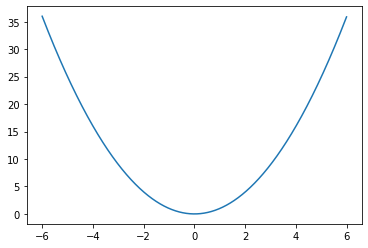

In [25]:

import matplotlib.pyplot as plt

def func(x):
    return x ** 2
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x)) / (h)
# 绘制 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

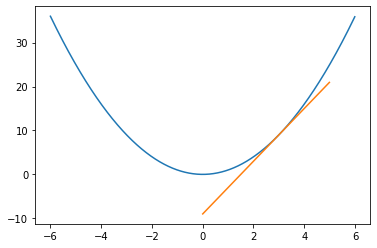

In [26]:
import matplotlib.pyplot as plt
# 切线函数
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d*x
    return d*t + y

# 绘制 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

# 绘制x = 3 时的切线
x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)
plt.show()

In [0]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):    
    x = init_x       
    res = [x]
    for i in range(epochs):         
        grad = dfunc(func,x)        
        x = x - grad * lr
        res.append(x)
    return np.array(res)

def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)

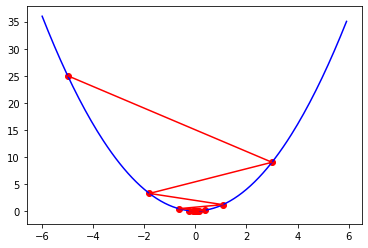

In [29]:
x = gradient_descent(func, -5, lr=0.8)
t = np.arange(-6.0, 6.0, 0.08)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    
plt.show()

In [0]:
import numpy as np

In [0]:

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [0]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
 
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [0]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [38]:
net.params['W1']

array([[ 0.01234307,  0.0206171 , -0.00267256,  0.00493172,  0.0035726 ],
       [-0.00953511,  0.00422477, -0.01529872,  0.01595091, -0.00544726],
       [ 0.0030067 , -0.00422311,  0.00946238, -0.01647292, -0.00504105],
       [ 0.00832021, -0.00049774,  0.00312244, -0.0015852 , -0.00236045]])

In [39]:
net.params['W2']

array([[ 0.00967531, -0.00670245, -0.00945167],
       [ 0.00122545, -0.00332531, -0.00825699],
       [-0.00087312, -0.01408017, -0.02384349],
       [ 0.01371578, -0.0112543 , -0.00105485],
       [ 0.00906653,  0.00552186,  0.00086537]])

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data

In [41]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [0]:
#y

In [0]:
y_hat = net.predict(x)

In [47]:
y[0:3,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [48]:
y_hat[0:3,:]

array([[0.0022742 , 0.00220307, 0.00219027],
       [0.00227415, 0.00220308, 0.00219019],
       [0.00227415, 0.0022031 , 0.00219027]])

In [0]:
epochs = 3000
lr     = 0.01

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

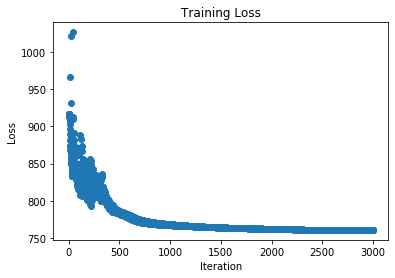

In [50]:
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [51]:
net.params['W1']

array([[-0.85927289, -5.92337563,  3.64215903, -0.89296565,  2.32135282],
       [-2.6913297 , -6.20020395,  3.18402086,  0.82383888,  3.30358179],
       [ 4.46047242,  8.97941034, -5.67259363, -3.54637965, -4.3261051 ],
       [ 2.15486693,  9.95524693, -6.02955505, -1.54429988, -4.77558263]])

In [0]:
y_hat = net.predict(x)

In [53]:
y[0:3,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [54]:
y_hat[0:3,:]

array([[6.15878811e-03, 7.73827118e-06, 3.92717575e-09],
       [6.08935410e-03, 7.82678301e-06, 3.95666598e-09],
       [6.14690072e-03, 7.75685090e-06, 3.93047705e-09]])

In [0]:
class Relu:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = (x <=0)
        out = np.maximum(0,x)
        return out

    def backward(self, dout):
        dout[self.cache] = 0
        dx = dout
        return dx

In [0]:
 class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        y  = self.out
        dx = dout * y * (1-y)
        return dx

In [0]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout)
        return dx

In [0]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y_hat = None 
        self.y = None 

    def forward(self, x, y):
        self.y = y
        self.y_hat = softmax_function(x)
        self.loss = cross_entropy_err(self.y_hat, self.y)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        dx = (self.y_hat - self.y) / batch_size
        return dx

In [0]:
def softmax_function(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [0]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [0]:
import numpy as np
from collections import OrderedDict

class ANN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return self.lastLayer.forward(y_hat, y)
  
    def gradient(self, x, y):
        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [0]:
import random
epochs     = 3000
lr         = 0.01
batch_size = 10
net = ANN(input_size=4, hidden_size=5, output_size=3)

train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)

## OCR

In [0]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
digits = load_digits()

In [75]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [76]:
digits.data.shape

(1797, 64)

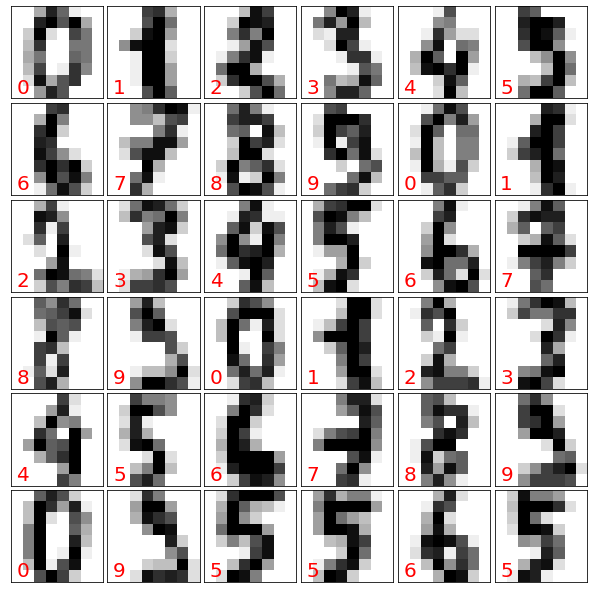

In [77]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

In [0]:
scaler = StandardScaler()
scaler.fit(digits.data)
X_scaled = scaler.transform(digits.data)

In [83]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), 
                    activation='relu', max_iter = 2000, 
                    solver='sgd',learning_rate='constant',
                    learning_rate_init=0.001, )
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

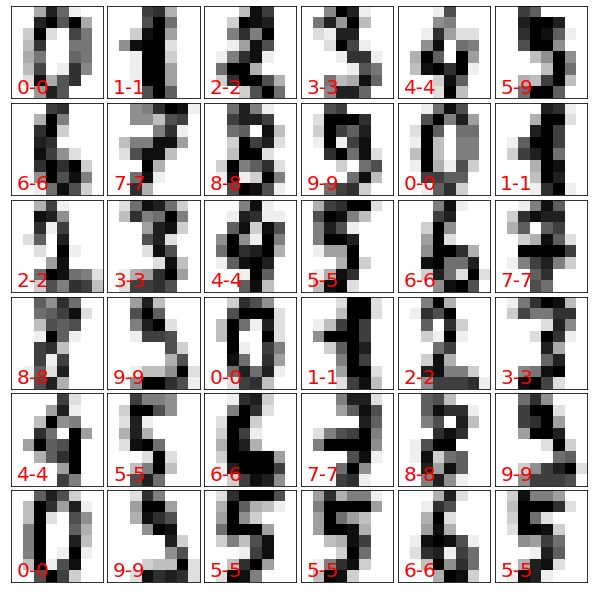

In [84]:
predicted = mlp.predict(X_scaled)
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(digits.target, predicted)

0.9977740678909294

In [88]:
mlp.coefs_[0].shape

(64, 30)

In [89]:
mlp.coefs_[1].shape

(30, 30)

In [90]:
mlp.coefs_[2].shape

(30, 30)

In [91]:
mlp.coefs_[3].shape

(30, 10)

In [92]:
mlp.coefs_[0]

array([[-0.22761221,  0.10583337, -0.20121886, ...,  0.22461993,
        -0.0530505 ,  0.20898026],
       [-0.0810389 , -0.00110642, -0.01919938, ..., -0.01952809,
        -0.08855999,  0.23232402],
       [-0.22994312, -0.01175639, -0.05566391, ..., -0.04561745,
        -0.0021015 ,  0.13000709],
       ...,
       [ 0.0238779 ,  0.02845178, -0.06554213, ..., -0.00613202,
         0.04032937,  0.00760052],
       [ 0.38347551, -0.15044444, -0.20985501, ...,  0.1523244 ,
        -0.11782021, -0.34148194],
       [ 0.24710552,  0.24911966,  0.12909392, ...,  0.11620724,
        -0.20352795, -0.26709731]])

In [93]:

import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [0]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [0]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [0]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


In [125]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 74us/step - loss: 1.0391 - acc: 0.7540 - val_loss: 0.4803 - val_acc: 0.8816
Epoch 2/15
60000/60000 [==============================] - 4s 70us/step - loss: 0.4185 - acc: 0.8897 - val_loss: 0.3470 - val_acc: 0.9062
Epoch 3/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.3398 - acc: 0.9055 - val_loss: 0.3031 - val_acc: 0.9154
Epoch 4/15
60000/60000 [==============================] - 4s 70us/step - loss: 0.3037 - acc: 0.9147 - val_loss: 0.2768 - val_acc: 0.9209
Epoch 5/15
60000/60000 [==============================] - 4s 70us/step - loss: 0.2796 - acc: 0.9201 - val_loss: 0.2614 - val_acc: 0.9248
Epoch 6/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.2609 - acc: 0.9255 - val_loss: 0.2474 - val_acc: 0.9303
Epoch 7/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.2450 - acc: 0.9304 - val_loss: 0.2318 - val_acc